# Homework III - Programming and critical analysis

## Exercise 5

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
import pandas as pd

parkinsonsDF = pd.read_csv('parkinsons.csv')
features = parkinsonsDF.drop('target', axis=1)
target = parkinsonsDF['target']

maeMLP = []
maeReLU = []
maeLin = []

for i in range(1, 10 + 1):
    feat_train, feat_test, target_train, target_test = train_test_split(
        features, target, train_size=0.8, random_state=i
    )
    mlp = MLPRegressor(
        hidden_layer_sizes=(10, 10),
        activation='identity',
        random_state=0
    )
    reLU = MLPRegressor(
        hidden_layer_sizes=(10, 10),
        activation='relu',
        random_state=0
    )
    lin = LinearRegression()
    mlp.fit(feat_train, target_train)
    reLU.fit(feat_train, target_train)
    lin.fit(feat_train, target_train)
    maeMLP.append(mean_absolute_error(mlp.predict(feat_test), target_test))
    maeReLU.append(mean_absolute_error(reLU.predict(feat_test), target_test))
    maeLin.append(mean_absolute_error(lin.predict(feat_test), target_test))

sns.boxplot(
    data=pd.DataFrame({
    'Mean Absolute Error': maeLin + maeMLP + maeReLU,
    'Regressor': ['Linear Regression' for x in maeLin] +
        ['MLP Regressor' for x in maeMLP] +
        ['MLP Regressor (ReLU)' for x in maeReLU]
    }),
    x='Regressor',
    y='Mean Absolute Error'
)
plt.show()

/home/kiko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kiko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kiko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Exercise 7

/home/kiko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kiko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kiko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kiko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kiko/.local/lib/python3.10/site-packages/sklearn/n

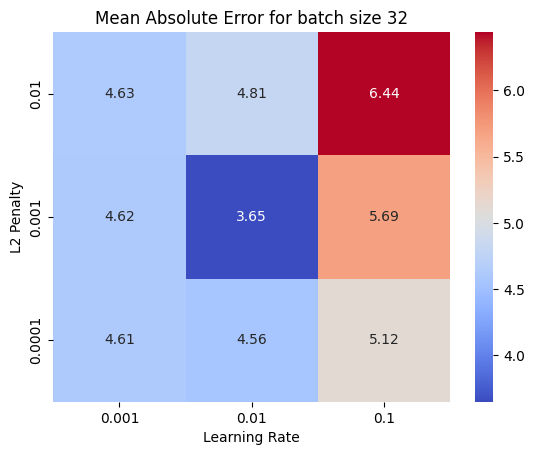

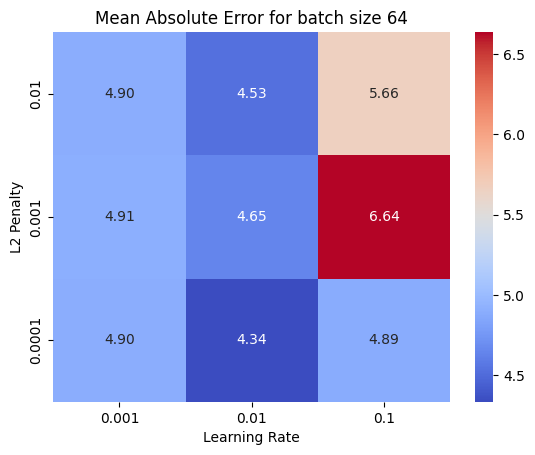

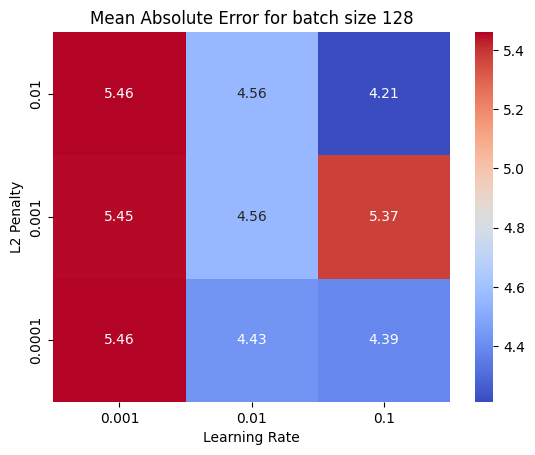

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import pandas as pd

parkinsonsDF = pd.read_csv('parkinsons.csv')
features = parkinsonsDF.drop('target', axis=1)
target = parkinsonsDF['target']
feat_train, feat_test, target_train, target_test = train_test_split(
    features, target, train_size=0.8, random_state=0
)

l2Penalty = []
learningRate = []
batchSize = []
mae = []

for l2pen in (0.0001, 0.001, 0.01):
    for lrate in (0.001, 0.01, 0.1):
        for bsize in (32, 64, 128):
            mlp = MLPRegressor(
                hidden_layer_sizes=(10, 10),
                alpha=l2pen,
                learning_rate_init=lrate,
                batch_size=bsize,
                random_state=0,
            )
            mlp.fit(feat_train, target_train)
            l2Penalty.append(l2pen)
            learningRate.append(lrate)
            batchSize.append(bsize)
            mae.append(mean_absolute_error(mlp.predict(feat_test), target_test))

data = pd.DataFrame({
'L2 Penalty': l2Penalty,
'Learning Rate': learningRate,
'Batch Size': batchSize,
'Mean Absolute Error': mae
})

for i, batch in enumerate(data['Batch Size'].unique()):
    filtData = data[data['Batch Size'] == batch]
    hmapData = filtData.pivot_table(index='L2 Penalty', columns='Learning Rate', values='Mean Absolute Error')
    hmap = sns.heatmap(hmapData, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title(f'Mean Absolute Error for batch size {batch}')
    plt.gca().invert_yaxis()
    plt.show()